In [238]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from datetime import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
import gc
import os
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error
import warnings

warnings.filterwarnings("ignore") #한글 폰트 깨짐 아직 해결 못함
lr = LinearRegression()

In [239]:
def csv_to_parquet(csv_path, save_name):
    df = pd.read_csv(csv_path)
    df.to_parquet(f'./{save_name}.parquet')
    del df
    gc.collect()
    print(save_name, 'Done.')
    
csv_to_parquet('./open/train.csv', 'train')
csv_to_parquet('./open/sample_submission.csv', 'sample_submission')

train = pd.read_parquet('./train.parquet')
sample_submission=pd.read_parquet('./sample_submission.parquet')

train Done.
sample_submission Done.


In [240]:
train['일시'] = pd.to_datetime(train['일시'].astype(str))
sample_submission['일시']=pd.to_datetime(sample_submission['일시'].astype(str))
train.head(3)

,일시,광진구,동대문구,성동구,중랑구
0,2018-01-01,0.592,0.368,0.580,0.162
1,2018-01-02,0.840,0.614,1.034,0.260
2,2018-01-03,0.828,0.576,0.952,0.288


In [241]:
print(train.shape)
print(sample_submission.shape)

(1461, 5)
(334, 5)


In [242]:
# order은 회귀함수의 차수(ex: 1차함수,2차함수...)
def get_view_df(df, target,order):
    viewd = df[['일시', target]]
    viewd = viewd.reset_index(drop=True)
    viewd = viewd.reset_index()
    print(target)
    fig=sns.regplot(x='index',y=target, data=viewd, line_kws={'color':"red"},order=order)
    plt.figure(figsize = (30,10))
    plt.show()

# 회귀선으로부터의 오차 출력
def residplot_df(df,target,order):
    viewd = df[['일시', target]]
    viewd = viewd.reset_index(drop=True)
    viewd = viewd.reset_index()
    print(target+' 오차')
    fig=sns.residplot(x='index',y=target, data=viewd, line_kws={'color':"red"},order=order)
    plt.figure(figsize = (30,10))
    plt.show()

광진구


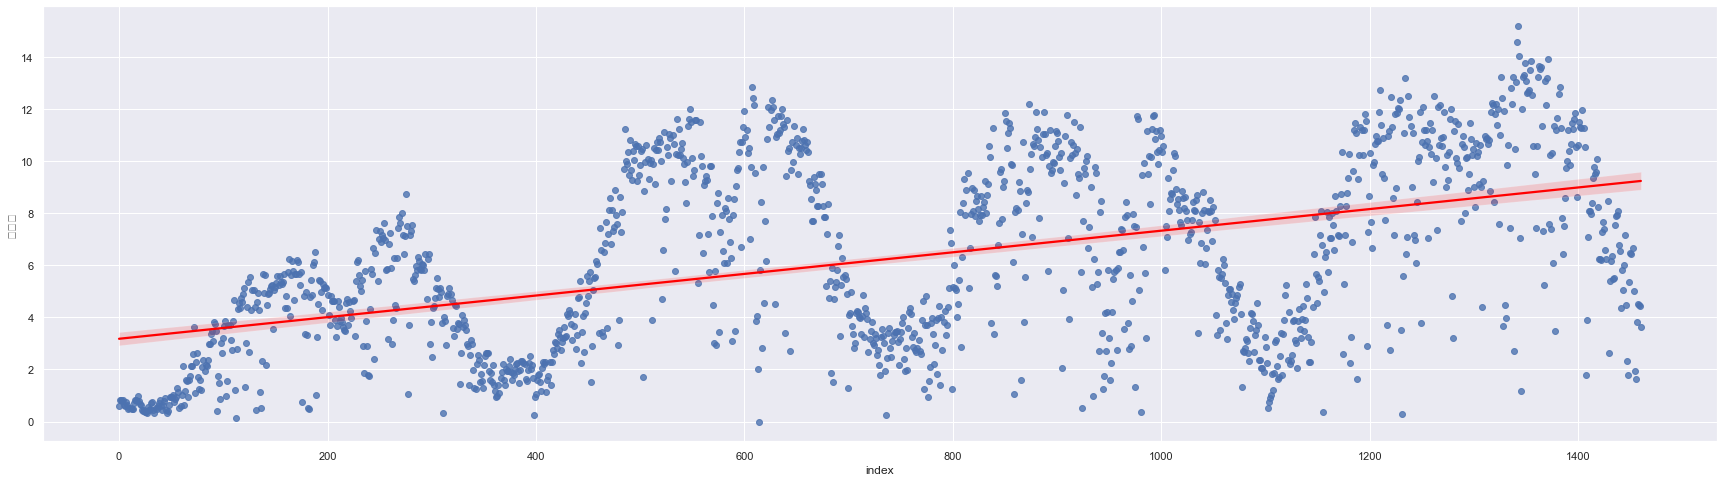

<Figure size 2160x720 with 0 Axes>

광진구 오차


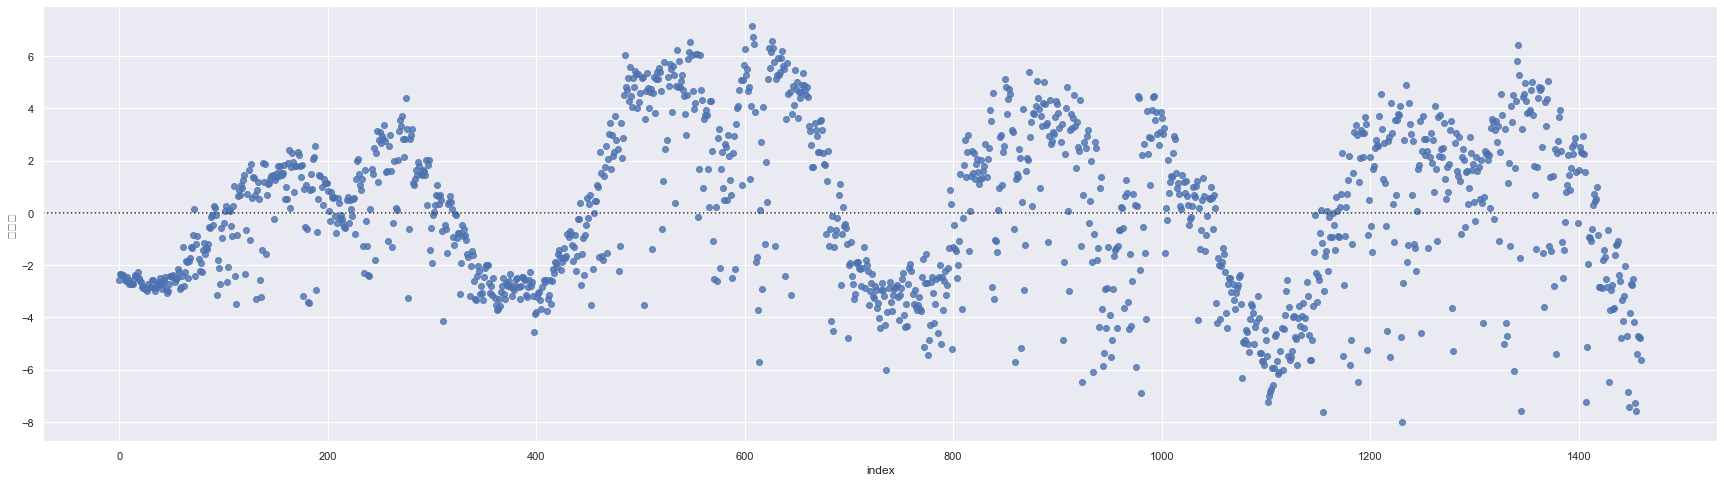

<Figure size 2160x720 with 0 Axes>

동대문구


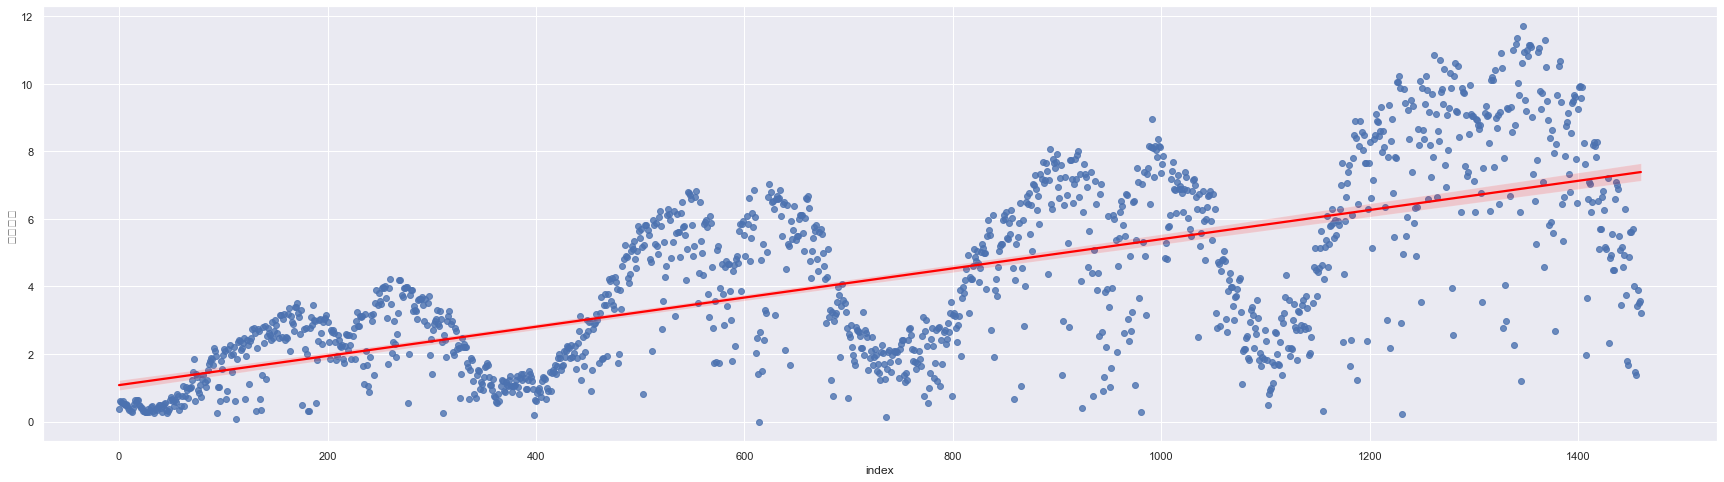

<Figure size 2160x720 with 0 Axes>

동대문구 오차


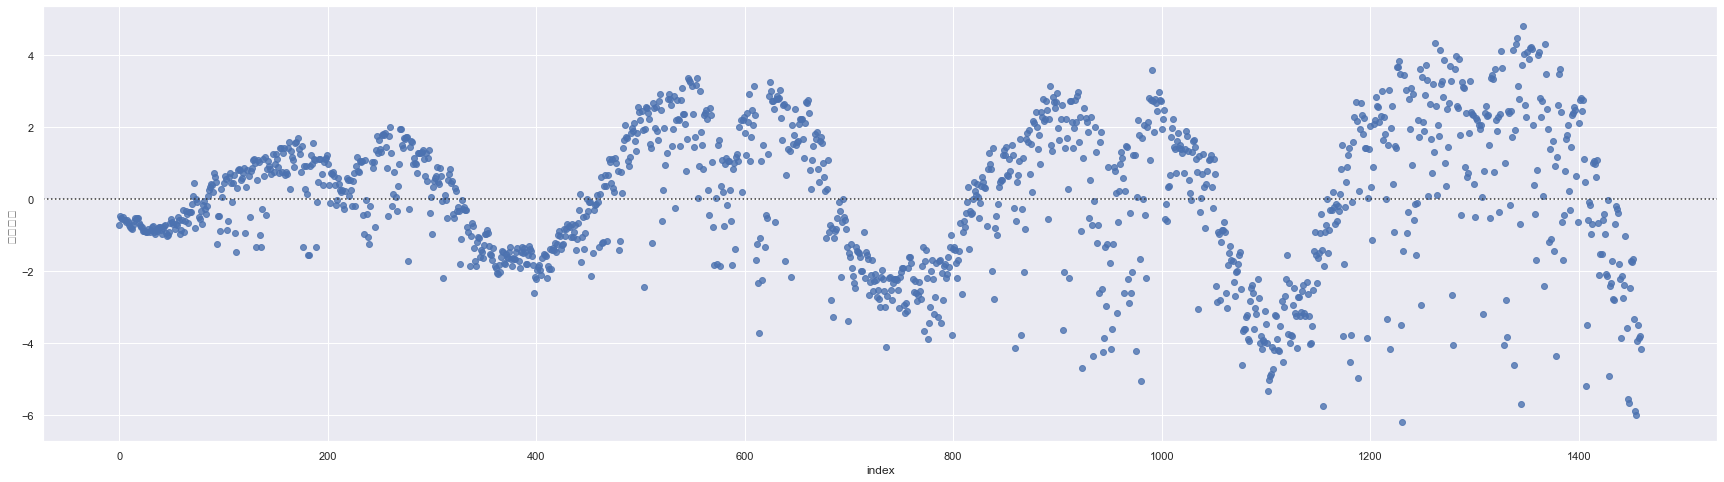

<Figure size 2160x720 with 0 Axes>

성동구


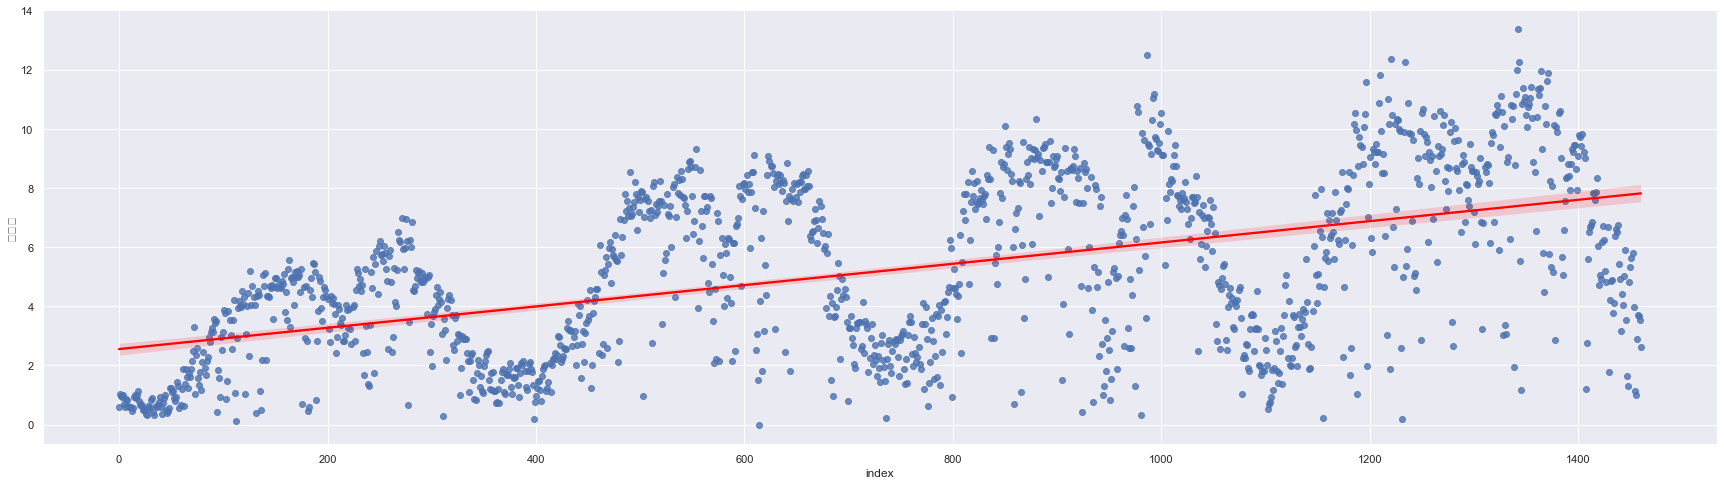

<Figure size 2160x720 with 0 Axes>

성동구 오차


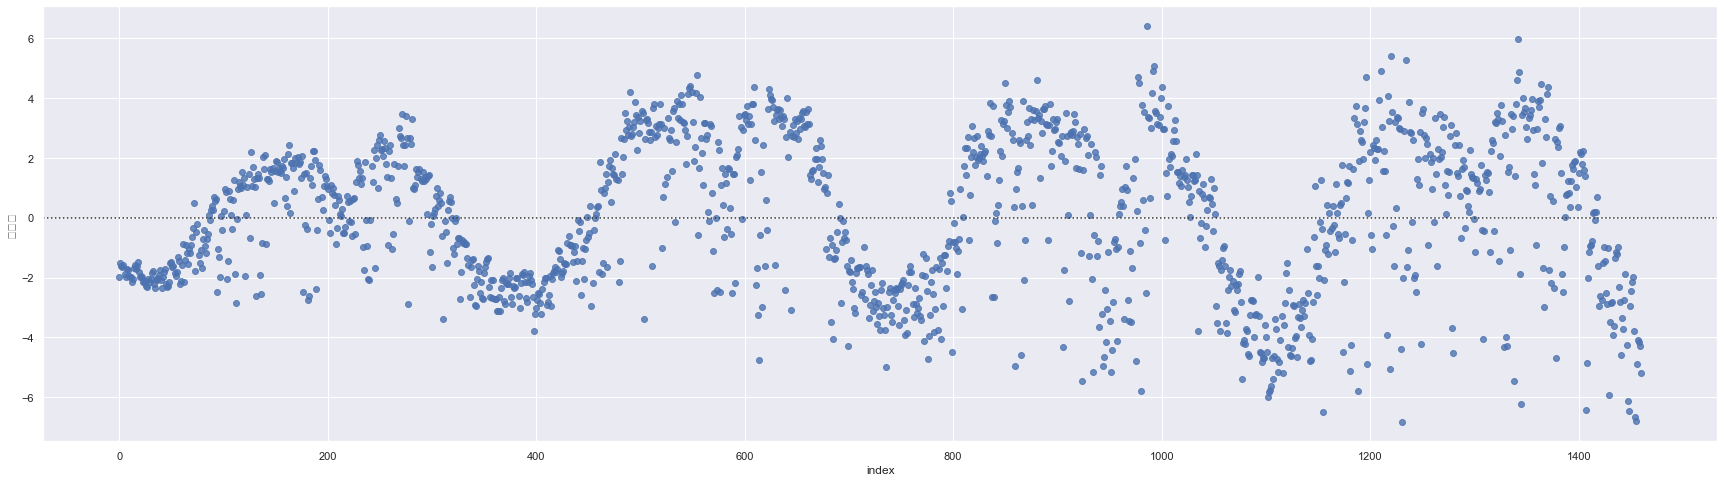

<Figure size 2160x720 with 0 Axes>

중랑구


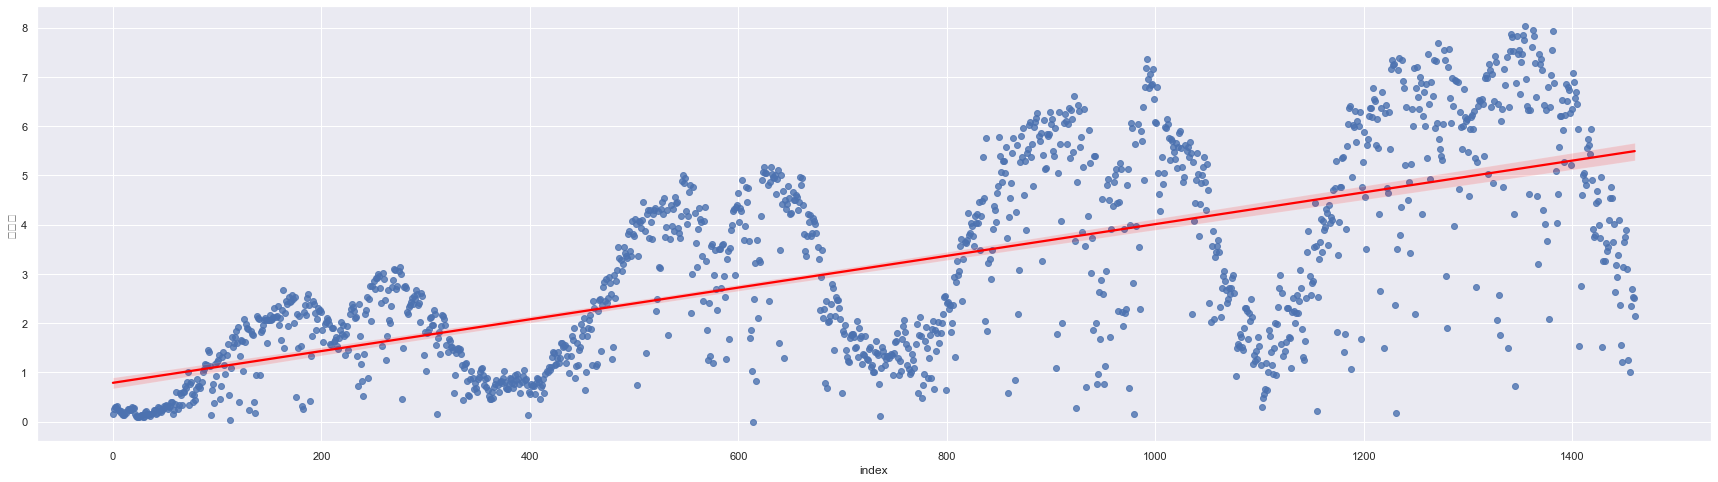

<Figure size 2160x720 with 0 Axes>

중랑구 오차


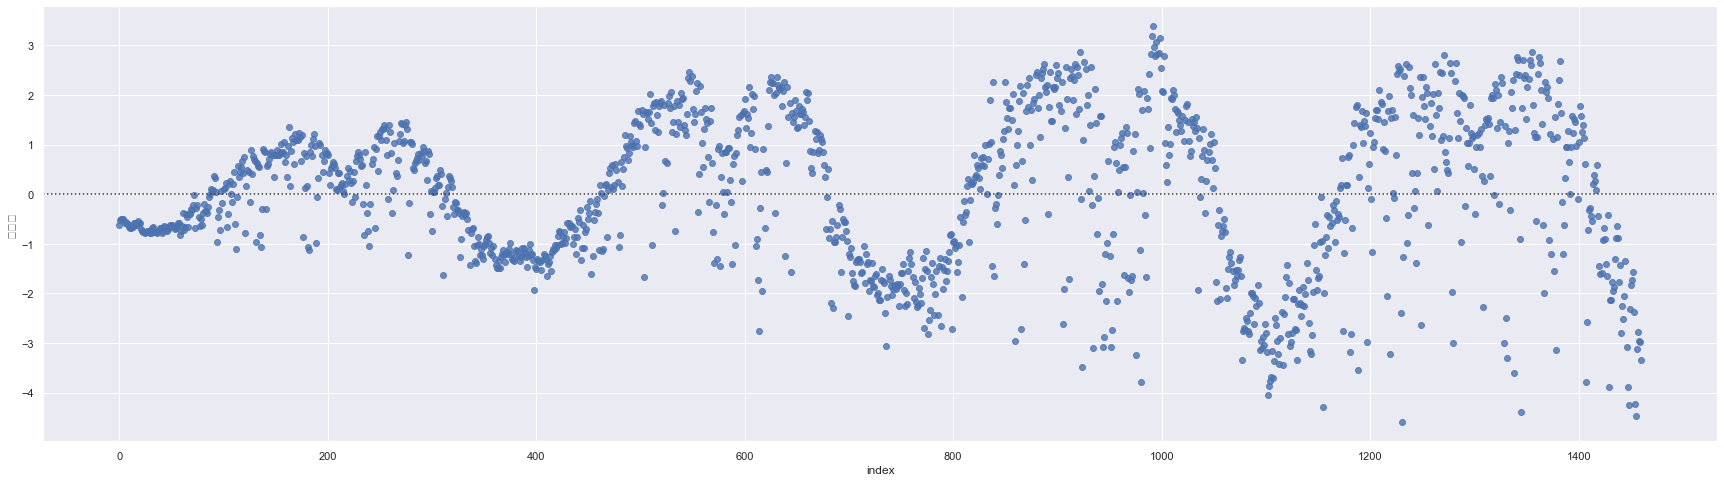

<Figure size 2160x720 with 0 Axes>

In [243]:
get_view_df(train, '광진구',1)
residplot_df(train,'광진구',1)
get_view_df(train, '동대문구',1)
residplot_df(train,'동대문구',1)
get_view_df(train, '성동구',1)
residplot_df(train,'성동구',1)
get_view_df(train, '중랑구',1)
residplot_df(train,'중랑구',1)

index가 커짐에 따라 데이터의 진폭이 커짐에 따라 오차가 커짐

광진구


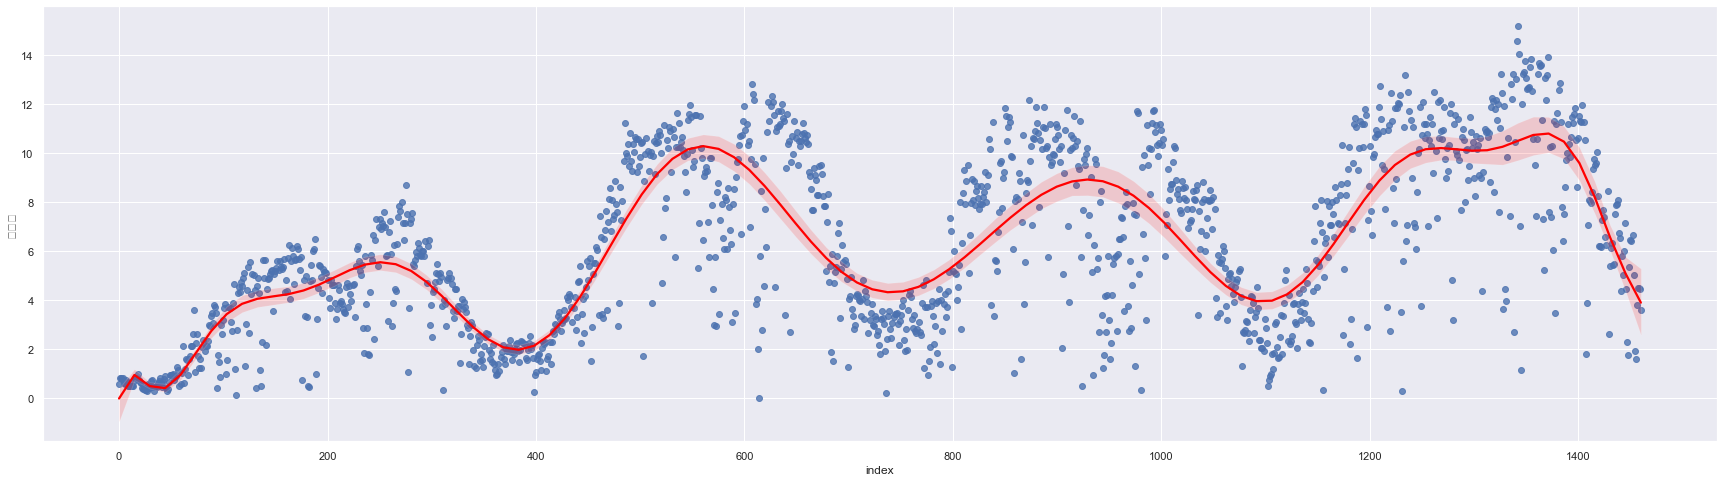

<Figure size 2160x720 with 0 Axes>

광진구 오차


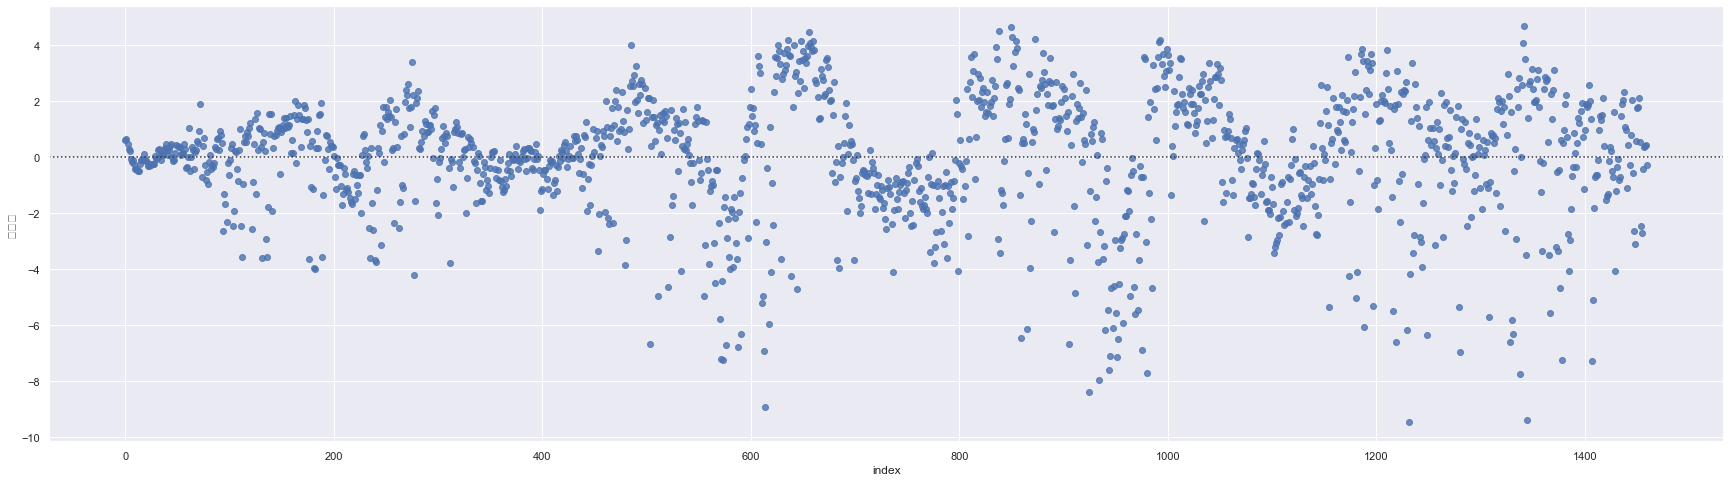

<Figure size 2160x720 with 0 Axes>

동대문구


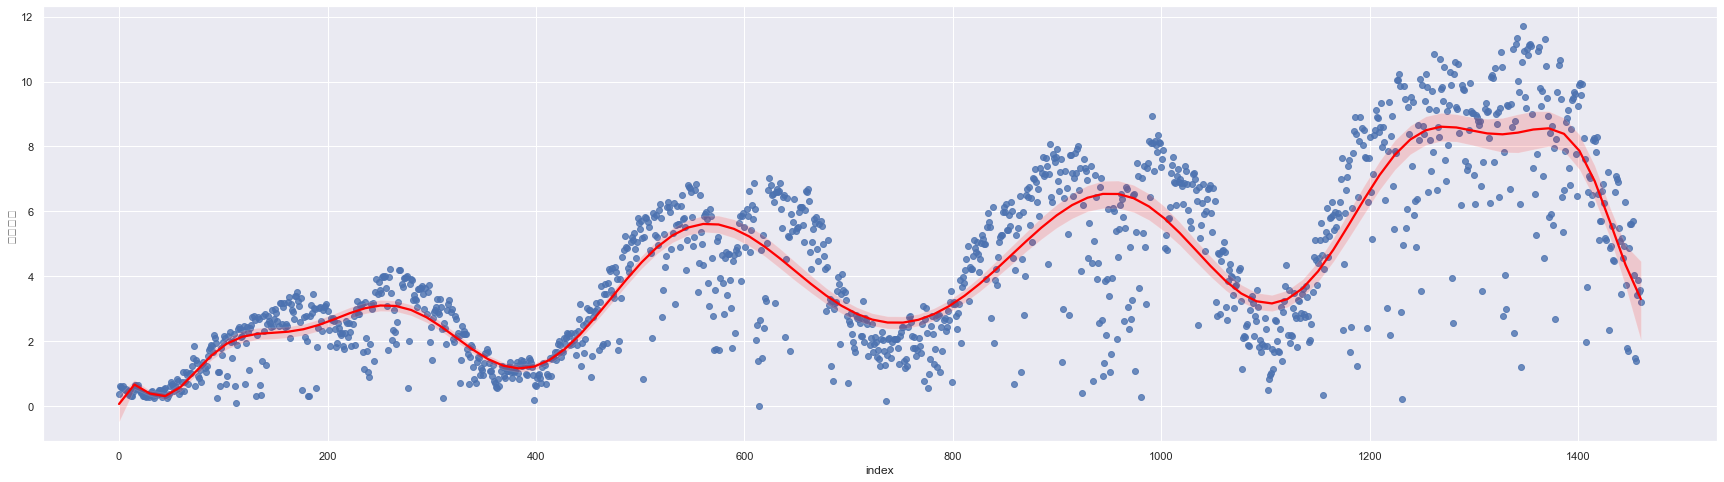

<Figure size 2160x720 with 0 Axes>

동대문구 오차


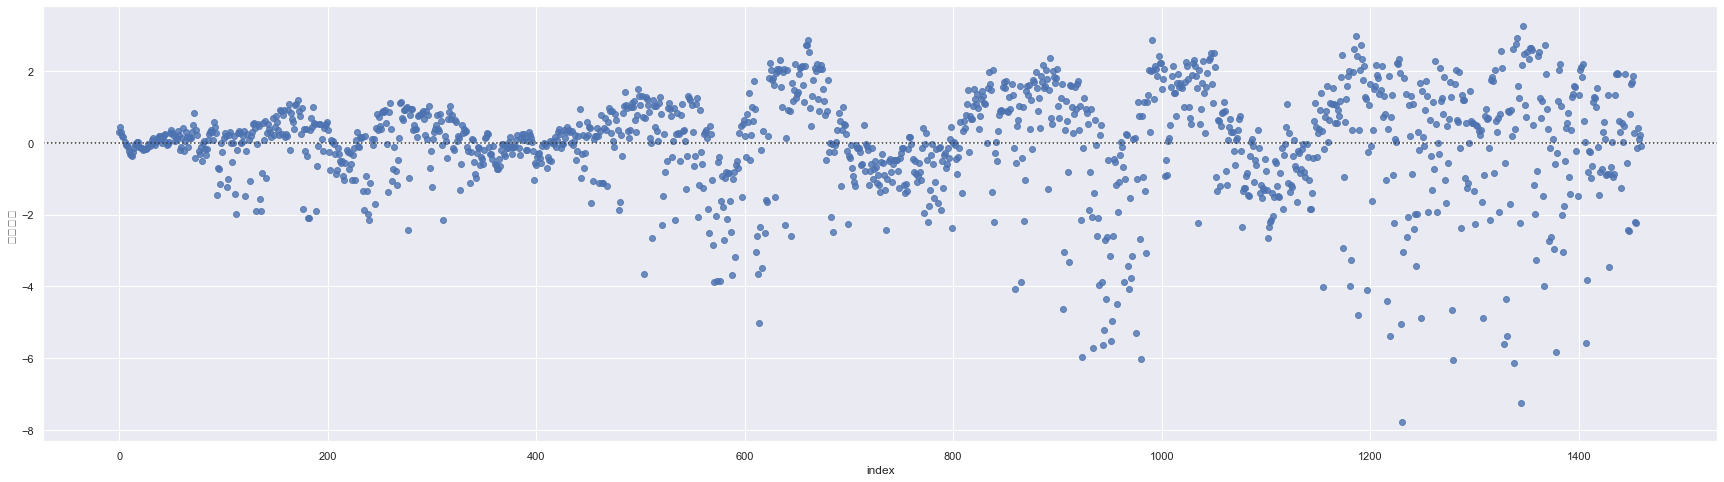

<Figure size 2160x720 with 0 Axes>

성동구


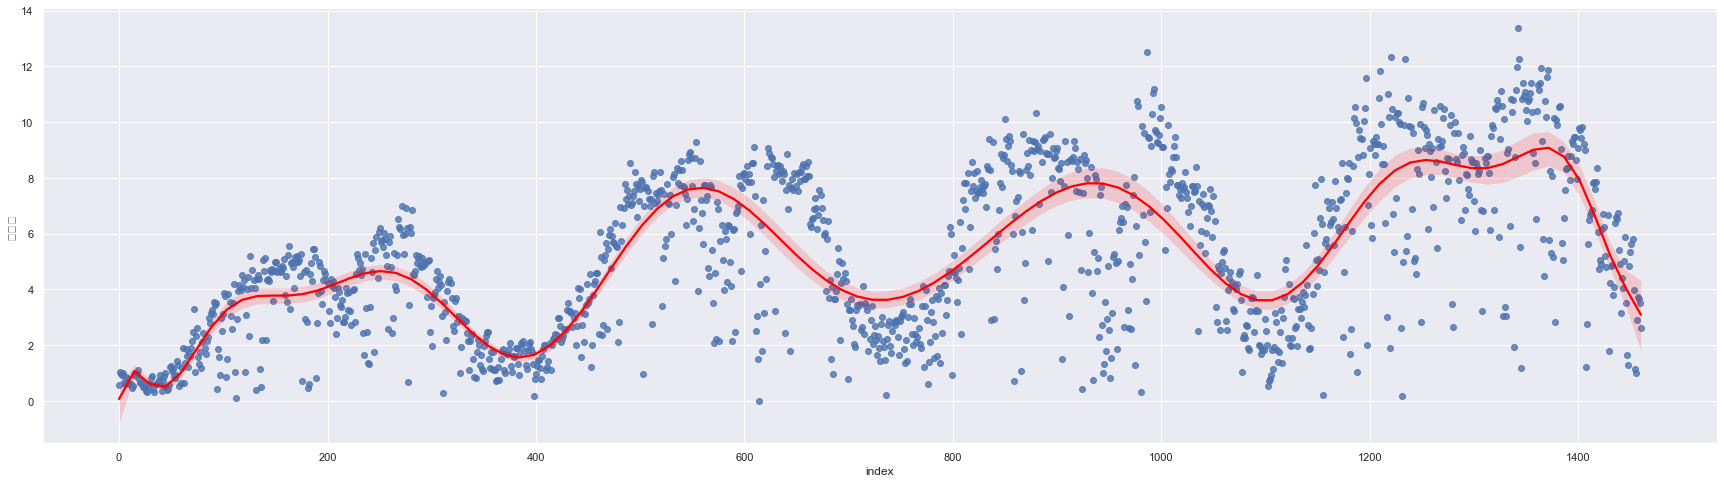

<Figure size 2160x720 with 0 Axes>

성동구 오차


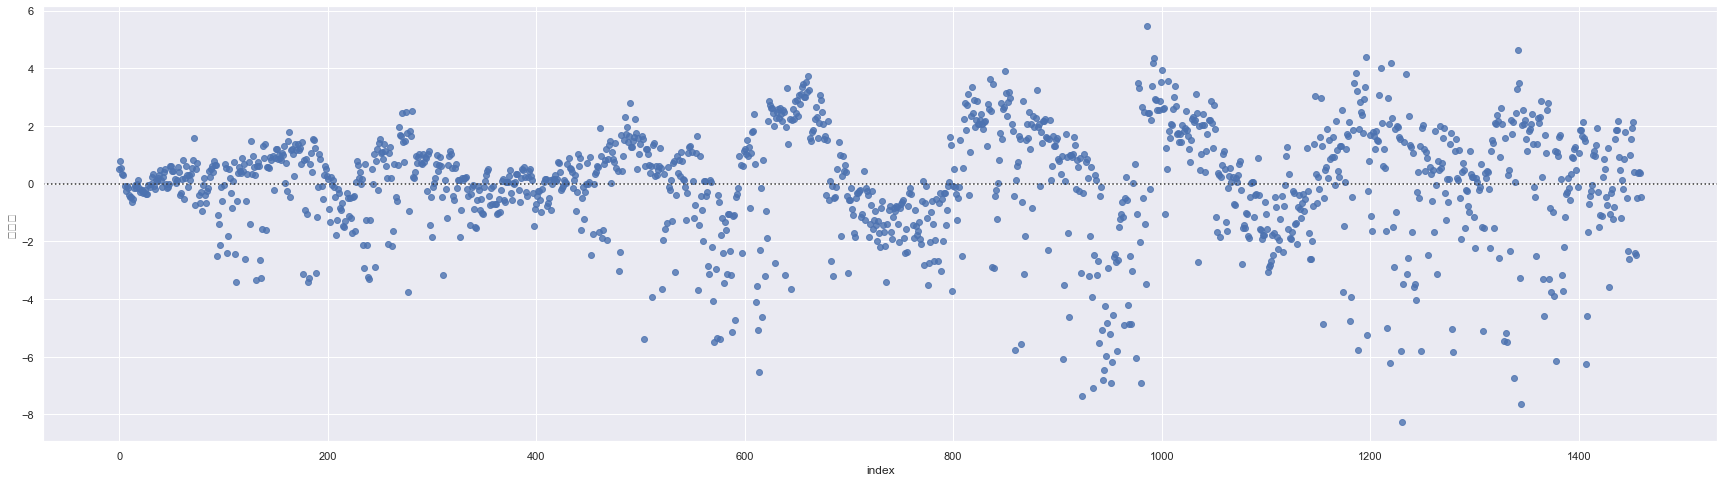

<Figure size 2160x720 with 0 Axes>

중랑구


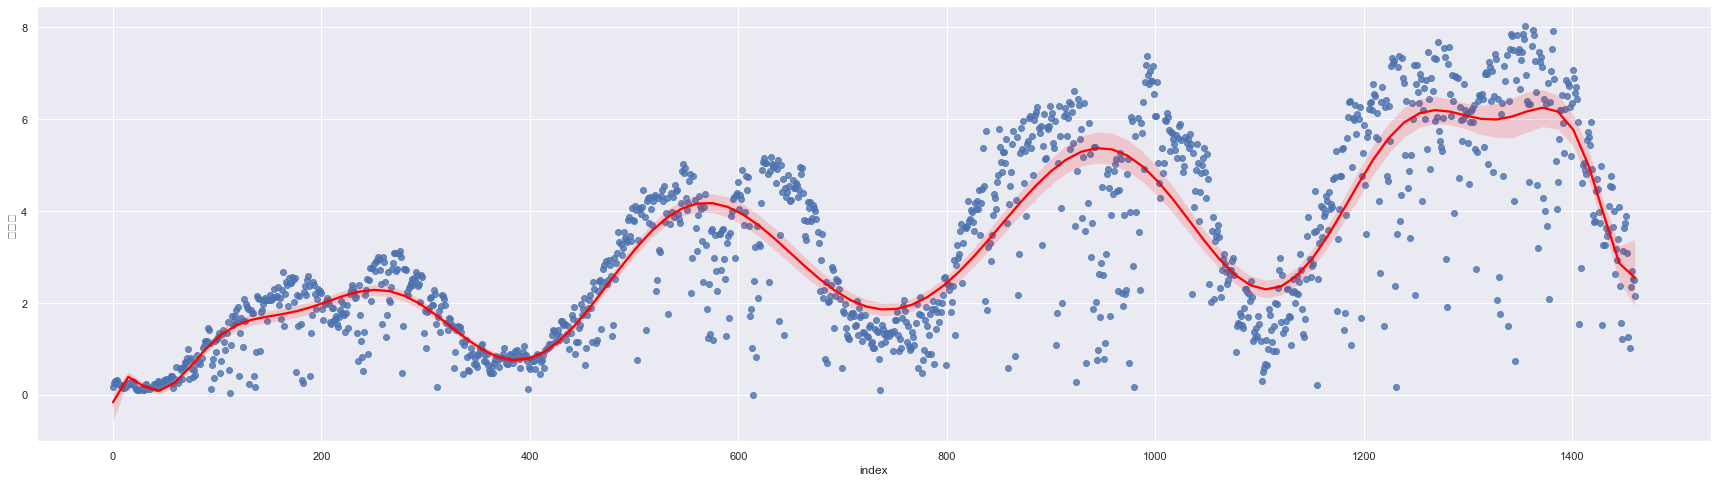

<Figure size 2160x720 with 0 Axes>

중랑구 오차


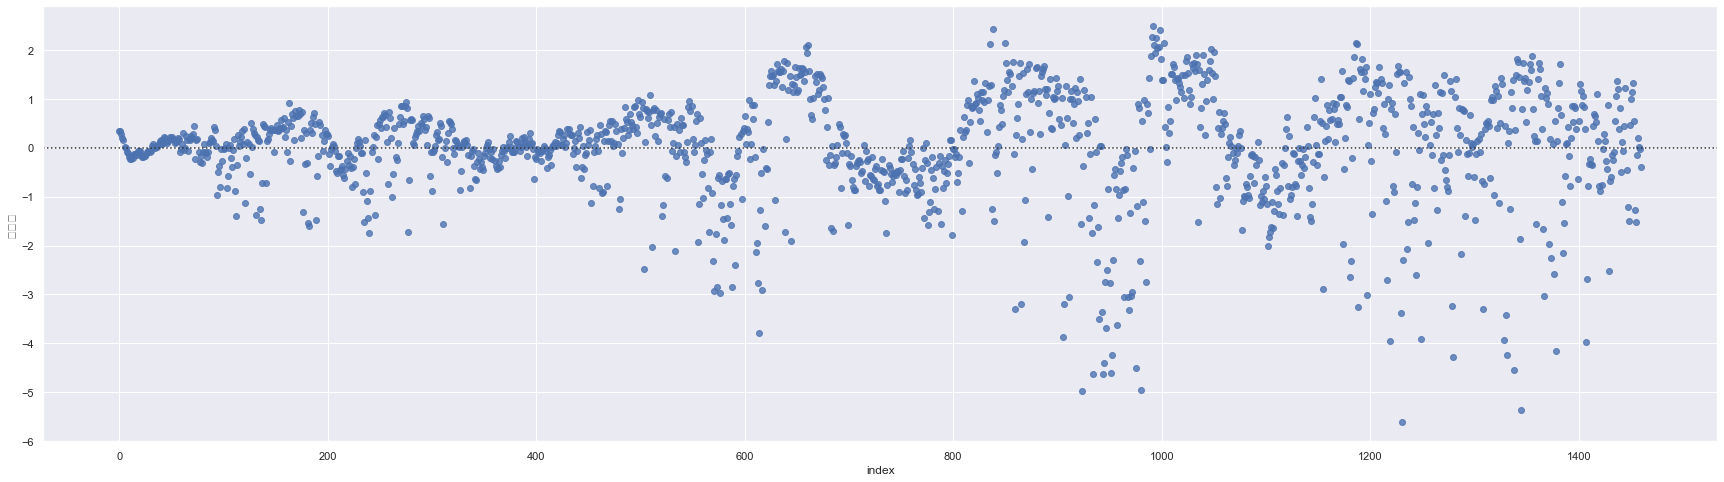

<Figure size 2160x720 with 0 Axes>

In [244]:
# seasonal한 up&down을 커버하기 위해서 order=20으로 설정
get_view_df(train, '광진구',20)
residplot_df(train,'광진구',20)
get_view_df(train, '동대문구',20)
residplot_df(train,'동대문구',20)
get_view_df(train, '성동구',20)
residplot_df(train,'성동구',20)
get_view_df(train, '중랑구',20)
residplot_df(train,'중랑구',20)

index가 커짐에 따라 오차에서 벗어난 데이터들이 많아짐, 벗어나는 정도가 커짐

In [ ]:
# MSE는 아직 진행 중..
# def MSE(train,predict):
#     MSE = mean_squared_error(train, predict)
#     print(MSE)